### NLP (Natural Language Processing) with Python
* Natural Language Processing (NLP) is a branch of Data Science which deals with Text data.
* "corpus" = collection of documents
* "corpora" = plural form of corpus

### Text Pre-processing
* Removing punctuations like . , ! $( ) * % @

* Removing URLs

* Removing Stop words

* Lower casing

* Remove Stopwords - Stopwords are the most commonly occurring words in a text which do not provide any valuable information.   stopwords like they, there, this, where, etc are some of the stopwords.

* Tokenization - Tokenizing separates text into units such as sentences or words.

* Stemming - Refers to the process of slicing the end or the beginning of words with the intention of removing affixes. It removes suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. It reduces the corpus of words but often the actual words get neglected. eg: Entitling,Entitled->Entitl

* Lemmatization - the objective of reducing a word to its base form and grouping together different forms of the same word. For example, the words “running”, “runs” and “ran” are all forms of the word “run”, so “run” is the lemma of all the previous words.

In [1]:
#!pip install spacy
#!pip install nltk

In [2]:
#!python -m spacy download en_core_web_md

In [3]:
#!pip install wordcloud

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

#from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [5]:
# from google.colab import files
# uploaded = files.upload()

# import pandas
# book=pd.read_csv("/content/apple.txt",error_bad_lines=False)

In [6]:
# import io
# book = pd.read_csv(io.BytesIO(uploaded['apple.txt']),error_bad_lines=False)
# book

book = pd.read_csv("C:/Users/Vikas Srivastava/Desktop/ExcelR/Latest DS Material/Day 33-Text Mining/apple.txt",error_bad_lines=False)
book


C:\Temp\ipykernel_21984\358701016.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("C:/Users/Vikas Srivastava/Desktop/ExcelR/Latest DS Material/Day 33-Text Mining/apple.txt",error_bad_lines=False)
b'Skipping line 6: expected 1 fields, saw 14\n'


,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [7]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing spaces
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [8]:
#book

In [9]:
# Joining the list into one string/text
text = ' '.join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [10]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z' is a string (string.punctuation here) to be removed.
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [11]:
#!pip install nltk

In [12]:
# import nltk

# nltk.download('punkt')

In [13]:
#Tokenization
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of']


In [14]:
#nltk.download('punkt')

In [15]:
#  import nltk
#  nltk.download('punkt')

In [16]:
len(text_tokens)
#Remove stopwords
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to C:\Users\Vikas
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
my_stop_words.append('the')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
my_stop_words
#my_stop_words.append('Its')

# Simplified look of the no_stop_tokes for loop
""" final_words = []
  for word in text_tokens:
   if word in my_stop_words:
     'do nothing'
   else:
     final_words.append(word)"""


no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data']


In [20]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


In [21]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:25])

['it', 'amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder', 'final', 'macbook', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog']


In [22]:
#!python -m spacy download en

In [23]:
# NLP english language model of spacy library
#nlp = spacy.load('en') 

In [24]:
nlp = spacy.load("en_core_web_sm")

In [25]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:25])

Its amazing battery last around 10 12 hrsbest laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology


In [26]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'Got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


#### Feature Extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [28]:
# pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys())

In [29]:
#pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
yr,888
youtube,887
you,886
yes,885
yearsmy,884
year,883
yay,882
xcode,881
writer,880
write,879


In [30]:
print(vectorizer.vocabulary_)

{'its': 433, 'amazing': 69, 'battery': 118, 'last': 457, 'around': 94, '10': 0, '12': 6, 'hrsb': 393, 'laptop': 450, 'student': 764, 'coder': 179, 'finally': 319, 'macbook': 489, 'possession': 611, 'got': 359, '50k': 34, 'diwali': 248, 'sale': 686, 'technically': 780, 'good': 356, 'laptopgood': 453, 'newsluxury': 541, 'product': 630, 'niche': 543, 'technology': 781, 'life': 467, 'reliable': 662, 'machine': 491, 'crash': 204, 'become': 122, 'defunct': 225, '610': 44, 'year': 883, 'antivirus': 80, 'require': 670, 'security': 699, 'datum': 216, 'transaction': 819, 'much': 531, 'well': 858, 'terrific': 786, 'sense': 705, 'pridebad': 621, 'news': 540, 'problems': 626, 'switch': 773, 'window': 865, 'base': 116, 'system': 774, 'less': 464, 'space': 739, 'hard': 373, 'disk': 243, 'cd': 165, 'drive': 253, 'inability': 407, 'transfer': 820, 'mac': 488, 'exist': 290, 'external': 301, 'disc': 241, 'unless': 827, 'format': 330, 'app': 83, 'mostly': 525, 'pay': 587, 'unreasonably': 828, 'expensive':

In [39]:
# print(vectorizer.get_feature_names()[50:100])
# print(X.toarray()[50:100])

# X.toarray()[50:100]

In [32]:
print(X.toarray().shape)

(2102, 889)


#### Let's see how can bigrams and trigrams can be included here

In [33]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,2),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [41]:
# print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 8 1]
 [1 0 0 ... 0 7 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer

#### TF-IDF
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific word appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document.

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

* TF-IDF=TF*IDF
* Higher the tf-idf weight, more important the term is.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 100)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
#print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04817457 0.34133602 0.05593706]
 [0.07524287 0.         0.         ... 0.         0.42412633 0.07943368]
 ...
 [0.         0.         0.         ... 0.47736394 0.         0.        ]
 [0.         0.         0.         ... 0.         0.30220455 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


####  Generate wordcloud

In [36]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

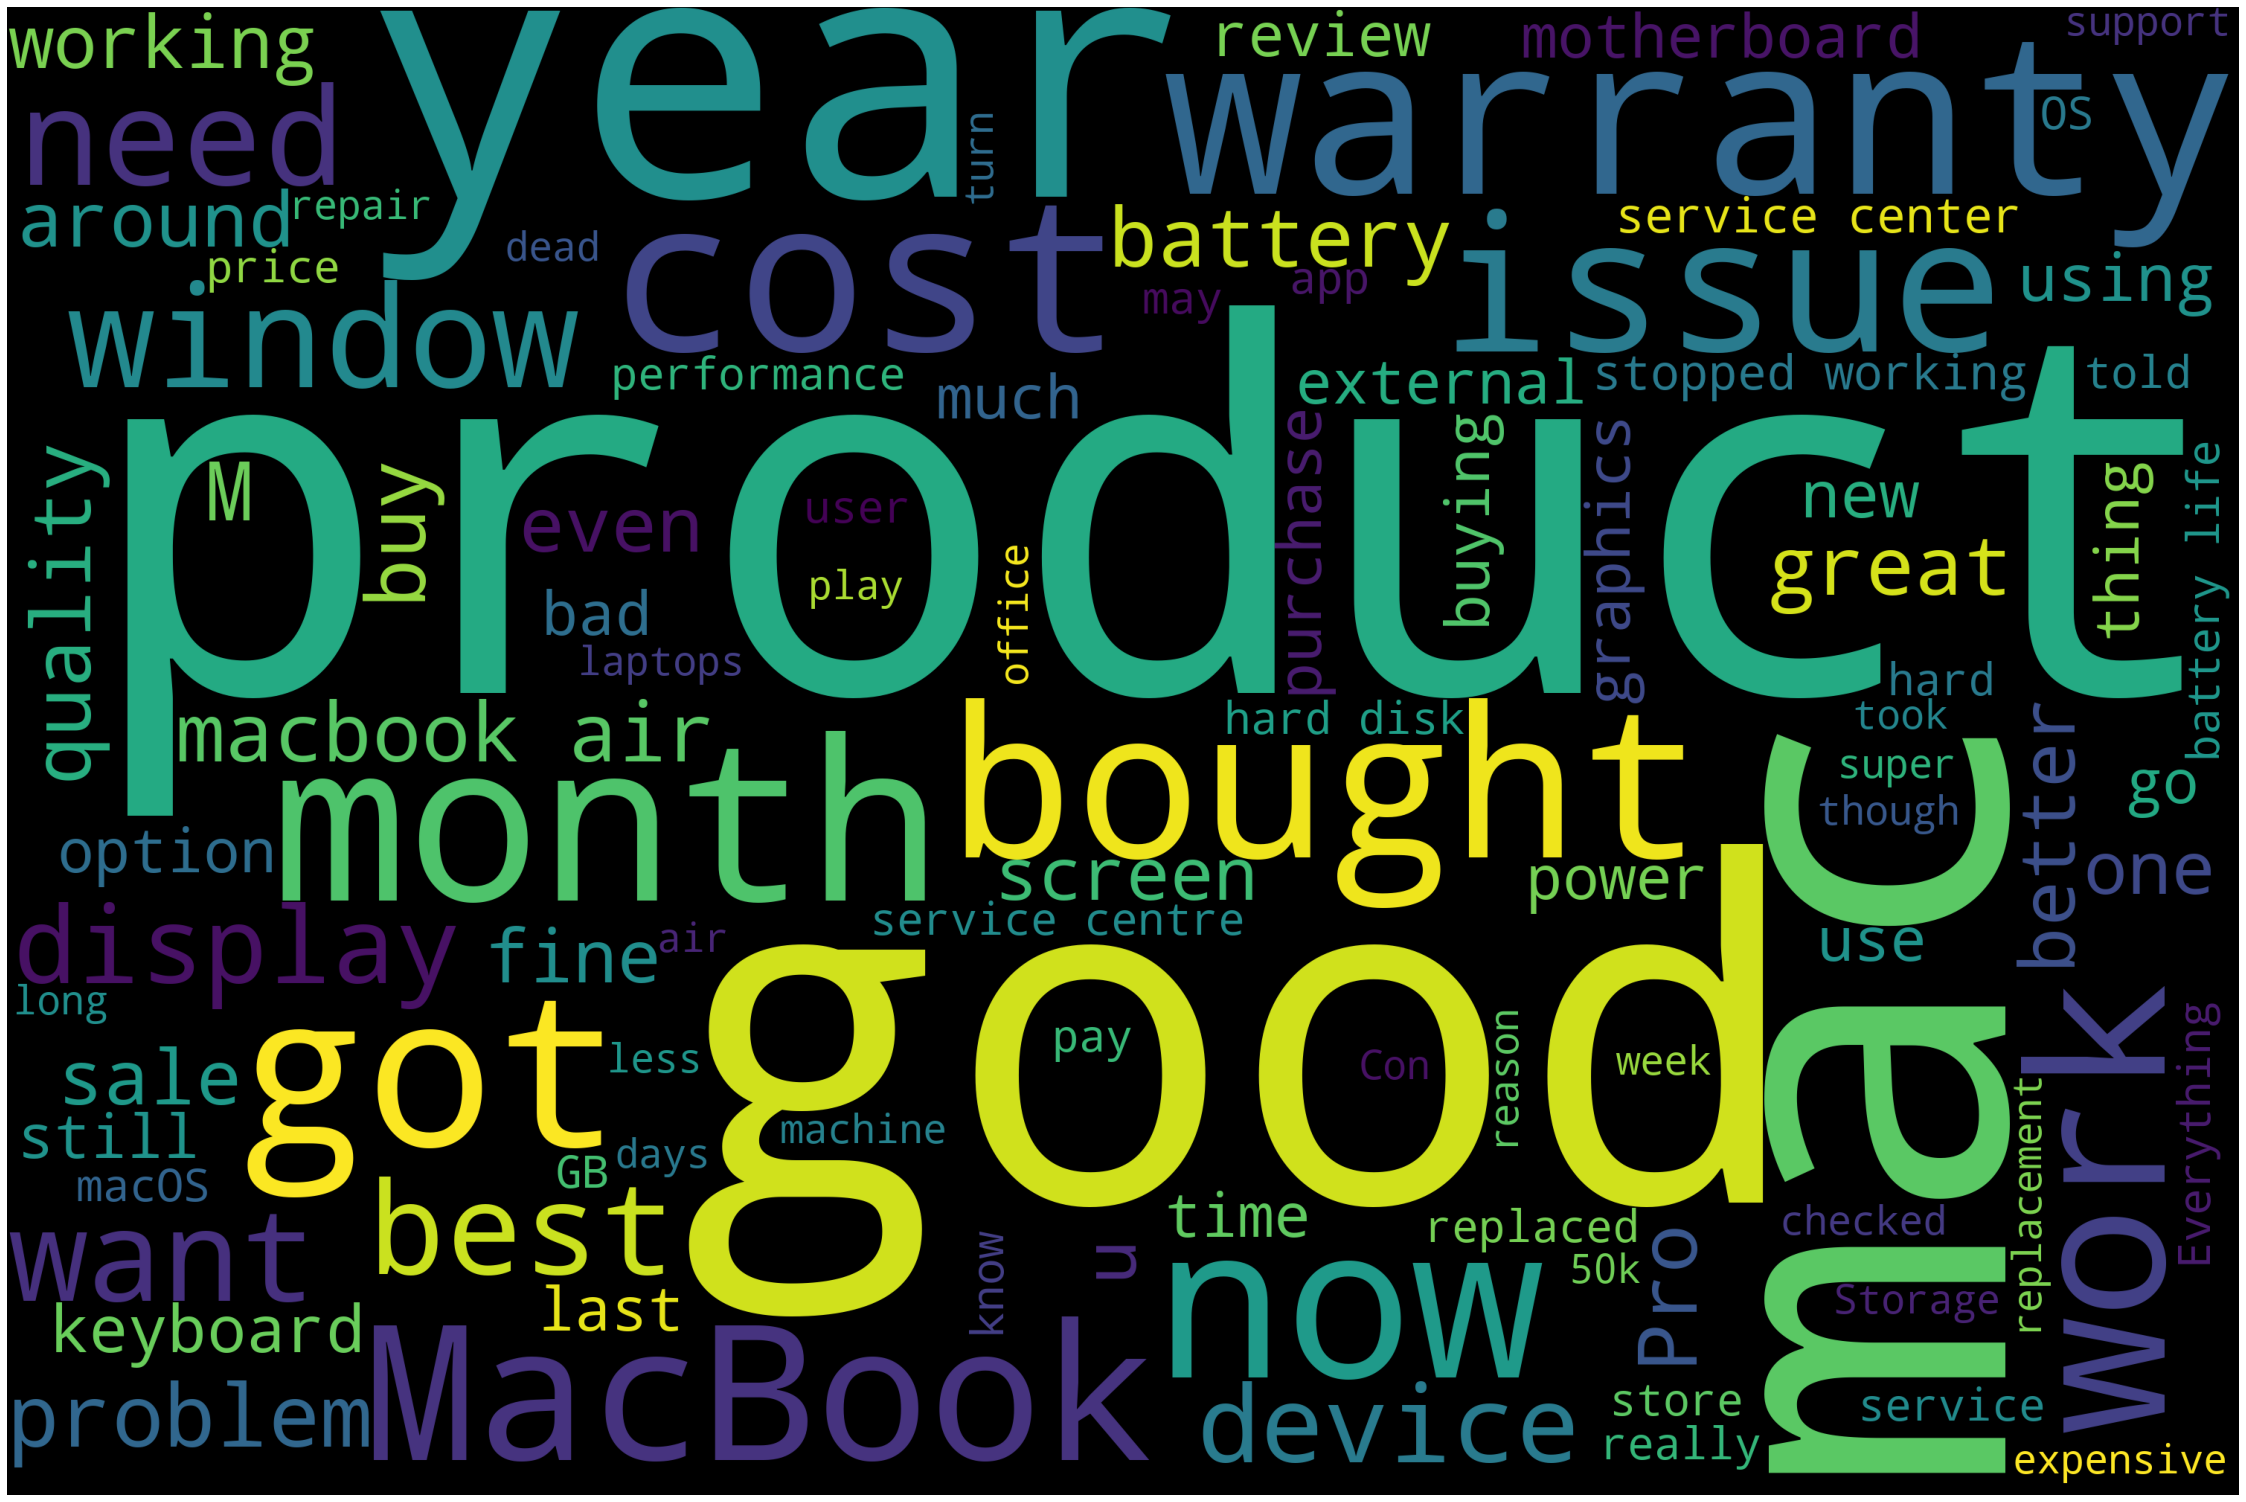

In [37]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')



wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [38]:
# Save image
#wordcloud.to_file("wordcloud.png")